Initialize directories names 

In [3]:
from pylab import *
from __future__ import print_function
import os

#Initilization of useful paths 

path_train = '/home/lorien/KTH/AG_projet/train/images_train'
path_labels = '/home/lorien/KTH/AG_projet/train/labels'
path_test = '/home/lorien/KTH/AG_projet/test/images_test'
path_processed = '/home/lorien/KTH/AG_projet/train/train_images_preprocessed'
path_test_processed = '/home/lorien/KTH/AG_projet/test/test_images_preprocessed'
path_label_processed = '/home/lorien/KTH/AG_projet/train/labels_processed'
path_cropped = '/home/lorien/KTH/AG_projet/train/images_cropped'
path_label_cropped = '/home/lorien/KTH/AG_projet/train/labels_cropped'
path_test_cropped = '/home/lorien/KTH/AG_projet/test/tst_images_cropped'
trn_dir = '/home/lorien/KTH/AG_projet/train'
tst_dir = '/home/lorien/KTH/AG_projet/test'

Load the images

In [2]:
#Load training and test glacier images
import os
import glob
import scipy.misc
from PIL import Image

def load_data(path_train, path_test):
    #create a list of all the input files
    trn_list = glob.glob(os.path.join(path_train,'*.png'))
    tst_list = glob.glob(os.path.join(path_test,'*.png'))
    #create a list of the file names
    trn_files = os.listdir(path_train)
    tst_files = os.listdir(path_test)

    n_train = len(trn_files)
    train_img = []
    for f in range(n_train):
        train_img.append(Image.open(trn_list[f])) #create a list of images (RGB in this case)
    
    n_test = len(tst_files)
    test_img = []
    for i in range(n_test):
        test_img.append(Image.open(tst_list[i])) #create a list of images (RGB in this case)

    images = {'train':train_img,'test':test_img}
    names = {'train':trn_files,'test':tst_files} # contains the names files of the training images and the test images 
    return(n_train, n_test, images, names)

In [4]:
# Check the data
n_tr, n_ts, image, names = load_data(path_train, path_test)
image = np.array(Image.open(os.path.join(path_train,names['train'][0])))
#matshow(image[:,:,0])
#matshow(image[:,:,1])
#matshow(image[:,:,2])
#matshow(image[:,:,3])
print(image.shape)

(300, 200, 4)


In [5]:
#Load the fronts images (training)
def load_fronts(path_labels):
    #create a list of all the fronts files
    fronts_list = glob.glob(os.path.join(path_labels,'*.png'))
    #create a list of the file names
    fronts_files = os.listdir(path_labels)

    n_fronts = len(fronts_files)
    fronts_img = []
    for f in range(n_fronts):
        fronts_img.append(Image.open(fronts_list[f])) #create a list of images (RGB in this case)
        
    fronts_images = {'fronts':fronts_img}
    fronts_names = {'fronts':fronts_files} # contains the names files of the training images and the test images 
    return(n_fronts, fronts_images, fronts_names)

In [6]:
# Check the fronts
n_fr, fr_im, fr_name = load_fronts(path_labels)
image = np.array(Image.open(os.path.join(path_labels,fr_name['fronts'][0])))
#matshow(image[:,:,0])
#matshow(image[:,:,1])
#matshow(image[:,:,2])
print(image.shape)

(300, 200, 3)


Pre processing step:

***Glaciers images***

***Fronts images***

In [7]:
from PIL import Image,ImageEnhance,ImageOps,ImageFilter

def preprocessing(path_train, path_test):
    n_tr,n_tst,images,names = load_data(path_train,path_test)
    out = {}
    out['train'] = os.path.join(trn_dir,'train_images_preprocessed')
    out['test'] = os.path.join(tst_dir,'test_images_preprocessed')

    if (not os.path.isdir(out['train'])):
        os.mkdir(out['train'])

    for i,n in zip(images['train'],names['train']): # a list of tuples (image, name)
        processed_image = ImageOps.equalize(ImageOps.autocontrast(i.convert('L'))).filter(ImageFilter.SMOOTH).filter(ImageFilter.EDGE_ENHANCE)
        #first: convert the multiband imageto a greyscale image with convert('L')
        #second: normalize the image contrast with autocontrast 
        #third: equalize the intensities to get a uniformly distributed histogram 
        #fourth: smoothing with SMOOTH
        #fifth: edge enhancement with EDGE_ENHANCEMENT (these were the functions used by the authors of the paper)
        processed_image.save(os.path.join(out['train'],'%s'%n))

    if (not os.path.isdir(out['test'])):
        os.mkdir(out['test']) 
    
    for i,n in zip(images['test'],names['test']): # a list of (image, name)
        processed_image = ImageOps.equalize(ImageOps.autocontrast(i.convert('L'))).filter(ImageFilter.SMOOTH).filter(ImageFilter.EDGE_ENHANCE)
        #first: convert the multiband imageto a greyscale image with convert('L')
        #second: normalize the image contrast with autocontrast 
        #third: equalize the intensities to get a uniformly distributed histogram 
        #fourth: smoothing with SMOOTH
        #fifth: edge enhancement with EDGE_ENHANCEMENT (these were the functions used by the authors of the paper)
        processed_image.save(os.path.join(out['test'],'%s'%n))

In [8]:
#Apply the pre processing
preprocessing(path_train, path_test)

In [9]:
#Pre processing og the fronts (Converting to gray-scale images)
def preprocessing_fronts(path_labels):
    n_tr,images,names = load_fronts(path_labels)
    out = {}
    out['fronts'] = os.path.join(trn_dir,'labels_processed')
    if (not os.path.isdir(out['fronts'])):
        os.mkdir(out['fronts'])

    for i,n in zip(images['fronts'],names['fronts']): # a list of (image, name)
        processed_image = i.convert('L')
        processed_image.save(os.path.join(out['fronts'],'%s'%n))


In [10]:
#Apply the pre processing to the fronts 
preprocessing_fronts(path_labels)

Train: 

***Load data for training***

***Cropping for the data***

***Data Augmentation***

***U-net***

In [11]:
#Load the processed images for the training
def load_data_for_training(path_processed, path_label_processed):
    #create a list of all the input files
    gl_list = glob.glob(os.path.join(path_processed,'*.png'))
    fr_list = glob.glob(os.path.join(path_label_processed,'*.png'))
    #create a list of the file names
    gl_files = os.listdir(path_processed)
    fr_files = os.listdir(path_label_processed)

    n_gl = len(gl_files)
    gl_img = []
    for f in range(n_gl):
        gl_img.append(Image.open(gl_list[f])) #create a list of images (greyscale in this case)
    
    n_fr = len(fr_files)
    fr_img = []
    for i in range(n_fr):
        fr_img.append(Image.open(fr_list[i])) #create a list of images (greyscale in this case)

    images = {'glaciers':gl_img,'labels':fr_img}
    names = {'glaciers':gl_files,'labels':fr_files} # contains the names files of the training images and the test images 
    return(n_gl, n_fr, images, names)    

In [12]:
#Load the training data: glaciers and corresponding digitized fronts
n_gl_nc, n_fr_nc, images_nc, names_nc = load_data_for_training(path_processed, path_label_processed)
im = np.array(images_nc['glaciers'][1])
print(im.shape)
im = np.array(images_nc['labels'][1])
print(im.shape)
#matshow(im)

#Check 
for file_count,f in enumerate(names_nc['glaciers']):
    img = np.array(Image.open(os.path.join(path_processed,f)))/255.
    #print(img)

(300, 200)
(300, 200)


In [13]:
#Crop the training data to have 2240x152 images and save the results
from scipy.misc import imsave
def crop_extra(n_gl, n_fr, images, names):
    hcrop,wcrop = 30,24
    h,w = 300,200
    out = {}
    out['images'] = os.path.join(trn_dir,'images_cropped')
    out['labels'] = os.path.join(trn_dir,'labels_cropped')
    if (not os.path.isdir(out['images'])):
        os.mkdir(out['images'])
    if (not os.path.isdir(out['labels'])):
        os.mkdir(out['labels'])

    for i,f in enumerate(names['glaciers']):
        img = np.array(Image.open(os.path.join(path_processed,f)))/255. 
        image_cr = img[hcrop:h-hcrop,wcrop:w-wcrop] 
        # get central part of the image
        imsave(os.path.join(out['images'],f), image_cr)

    for i,f in enumerate(names['labels']):
        lbl = np.array(Image.open(os.path.join(path_label_processed,f)))/255.  
        label_cr = lbl[hcrop:h-hcrop,wcrop:w-wcrop]
        imsave(os.path.join(out['labels'],f), label_cr)
        

In [14]:
#Apply the cropping
crop_extra(n_gl_nc, n_fr_nc, images_nc, names_nc)

/home/lorien/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/lorien/.local/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [15]:
#Load training data that is  cropped and check the results 
n_gl, n_fr, images, names = load_data_for_training(path_cropped, path_label_cropped)
im = np.array(images['glaciers'][1])
print(im.shape)
im = np.array(images['labels'][1])
print(im.shape)
#matshow(im)

for file_count,f in enumerate(names['glaciers']):
    img = np.array(Image.open(os.path.join(path_processed,f)))/255.
    #print(img)

(240, 152)
(240, 152)


In [16]:
#Data augmentation: conf == 1 : apply two modifications to the data to get the triple of
#original number of images, conf == 2 :  apply only one modification to the data to get 
#the double of the original number of images. Better choose conf == 1. 
def augment_data(n_gl, n_fr, images, names, conf):
    n=n_gl
    if conf==1:
        n = n*3
    if conf==2:
        n=n*2
    h,w = 240, 152 # define your new target dimensions

    train_img = np.ones((n,h,w))
    train_lbl = np.ones((n,h,w))
    train_img_orig = np.ones((123,h,w))
    
    count=0
    for file_count,f in enumerate(names['glaciers']):
        gl = Image.open(os.path.join(path_cropped,f))
        train_img[count][:h,:w] = np.array(gl)/255. #keep the original
        count += 1
        train_img_orig[file_count][:h,:w] = np.array(gl)/255.
        if conf == 1: #invert colors and mirror horizontally
            train_img[count][:h,:w] = np.array(ImageOps.invert(gl))/255.
            count += 1
            train_img[count][:h,:w] = np.array(ImageOps.mirror(gl))/255.
            count += 1
        elif conf == 2: #mirror horizontally
            train_img[count][:h,:w] = np.array(ImageOps.mirror(gl))/255.
            count += 1
        
        
    count_fr = 0
    for file_count,f in enumerate(names['labels']):
        fr = Image.open(os.path.join(path_label_cropped,f))
        train_lbl[count_fr][:h,:w] = np.array(fr)/255.#keep the original
        count_fr += 1
        if conf == 1: #invert colors and mirror horizontally
            train_lbl[count_fr][:h,:w] = np.array(fr)/255.
            count_fr += 1
            train_lbl[count_fr][:h,:w] = np.array(ImageOps.mirror(fr))/255.
            count_fr += 1
        elif conf == 2:#mirror horizontally
            train_lbl[count_fr][:h,:w] = np.array(ImageOps.mirror(fr))/255.
            count_fr += 1
    return {'trn_img':train_img.reshape(n,h,w,1),'trn_lbl':train_lbl.reshape(n,h*w,1),
    'trn_names':names, 'trn_orig':train_img_orig.reshape(123,h,w,1)} 

In [17]:
#Apply the data augmentation
data = augment_data(n_gl, n_fr, images, names, 1) 
continue_training = 0
print(data['trn_img'].shape)
print(data['trn_lbl'].shape)
#print(data['trn_names'])

(369, 240, 152, 1)
(369, 36480, 1)


In [18]:
#Taken from the code written by the paper authors(paper: https://www.preprints.org/manuscript/201811.0529/v1)

def set_ratio(lbls):
    #-- count the proportion of white pixels to black pixels
    white_tot = 0
    black_tot = 0
    tot_size = lbls.shape[1]
    print ('total size =  ', lbls.shape[1])
    for i in range(len(lbls)):
        white_count = np.count_nonzero(lbls[i])
        white_tot += white_count
        black_tot += tot_size - white_count
    
    return np.float(white_tot)/np.float(black_tot)

#-- set weight matrix for samples
def set_weights(lbls,ratio):
    #-- get rid of last dimensin
    lbls = lbls.reshape(lbls.shape[0],\
        lbls.shape[1])#,lbls.shape[2])
    #-- initialize weights
    w = np.ones((lbls.shape))
    #-- loop through images
    for i in range(lbls.shape[0]):
        #-- flatten out image and get indices of boundaries
        ind = np.nonzero(lbls[i] == 0.)
        w[i][ind] *= ratio

    print ('weight: ', ratio)
    print ('weight shape: ', w.shape)
    return w

In [19]:
init_weights == 1
if init_weights == 1:
    ratio = set_ratio(data['trn_lbl'])
    sample_weights = set_weights(data['trn_lbl'], ratio)

total size =   36480
weight:  82.2243346008
weight shape:  (369, 36480)


In [35]:
continue_training=0
# to recover saved models and keep training them

In [37]:
import tensorflow
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import losses, optimizers
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow.keras.layers as kl
import tensorflow.keras.models as km
from tensorflow.keras import backend as K
K.clear_session()

if continue_training == 0:

    #input data: 
    inputs = kl.Input((240,152,1))

    #model: 
    #conv and down samp:
    conv1 = kl.Conv2D(12, (3, 3), activation='relu', padding='same')(inputs)
    drop1 = kl.Dropout(0.2)(conv1)
    conv2 = kl.Conv2D(12,(3, 3),activation='relu',padding='same')(drop1)
    mxpool1 = kl.MaxPooling2D(pool_size=(2,2))(conv2)
    conv3 = kl.Conv2D(12*2, (3, 3), activation='relu', padding='same')(mxpool1)
    drop2 = kl.Dropout(0.2)(conv3)
    conv4 = kl.Conv2D(12*2,(3, 3),activation='relu',padding='same')(drop2)
    mxpool2 = kl.MaxPooling2D(pool_size=(2,2))(conv4)
    conv5 = kl.Conv2D(12*3, (3, 3), activation='relu', padding='same')(mxpool2)
    drop3 = kl.Dropout(0.2)(conv5)
    conv6 = kl.Conv2D(12*3,(3, 3),activation='relu',padding='same')(drop3)
    mxpool3 = kl.MaxPooling2D(pool_size=(2,2))(conv6) 
    conv7 = kl.Conv2D(12*4, (3, 3), activation='relu', padding='same')(mxpool3)
    drop4 = kl.Dropout(0.2)(conv7)
    conv8 = kl.Conv2D(12*4,(3, 3),activation='relu',padding='same')(drop4)
    #up samp:
    upsamp1 = kl.UpSampling2D(size=(2,2))(conv8)
    #copy and concat:
    up_concat1 = kl.concatenate([upsamp1,conv5],axis=3)
    #conv:
    conv9 = kl.Conv2D(12*3, (3, 3), activation='relu', padding='same')(up_concat1)
    drop5 = kl.Dropout(0.2)(conv9)
    conv10 = kl.Conv2D(12*3,(3, 3),activation='relu',padding='same')(drop5)
    #up samp:
    upsamp2 = kl.UpSampling2D(size=(2,2))(conv10)
    #copy and concat:
    up_concat2 = kl.concatenate([upsamp2,conv4],axis=3)
    #conv:
    conv11 = kl.Conv2D(12*2, (3, 3), activation='relu', padding='same')(up_concat2)
    drop6 = kl.Dropout(0.2)(conv11)
    conv12 = kl.Conv2D(12*2,(3, 3),activation='relu',padding='same')(drop6)
    #up samp:
    upsamp3 = kl.UpSampling2D(size=(2,2))(conv12)
    #copy and concat:
    up_concat3 = kl.concatenate([upsamp3,conv2],axis=3)
    #conv:
    conv13 = kl.Conv2D(12, (3, 3), activation='relu', padding='same')(up_concat3)
    drop7= kl.Dropout(0.2)(conv13)
    conv14 = kl.Conv2D(12,(3, 3),activation='relu',padding='same')(drop7)
    conv15 = kl.Conv2D(3,(3, 3),activation='relu',padding='same')(conv14)
    conv16 = kl.Conv2D(1,(1,1),activation='sigmoid')(conv15)
    out = kl.Reshape((36480,1))(conv16)
    
    model = km.Model(inputs=inputs,outputs=out)
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']
        ,sample_weight_mode="temporal")
else:
    model = tensorflow.keras.models.load_model('model_train.h5')
    

model_checkpoint = tensorflow.keras.callbacks.ModelCheckpoint('model_train.h5', monitor='loss',
            verbose=1,save_best_only=True)
lr_callback = ReduceLROnPlateau(monitor='acc', factor=0.5, patience=5,
            verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0 #learning rate 
#stopping = EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=5, verbose=1, mode='auto')
# Experiment with using early stopping or not
model.fit(data['trn_img'], data['trn_lbl'], batch_size=10, epochs=80, verbose=1,
            validation_split=0.1, shuffle=True, sample_weight=sample_weights,callbacks=[lr_callback,model_checkpoint])

# Final save
model.save('model_train.h5')
    

Train on 332 samples, validate on 37 samples
Epoch 1/80
330/332 [============================>.] - ETA: 0s - loss: 0.3690 - acc: 0.7678
Epoch 00001: saving model to model_train.h5
332/332 [==============================] - 70s 210ms/step - loss: 0.3698 - acc: 0.7676 - val_loss: 0.5114 - val_acc: 0.7455
Epoch 2/80
330/332 [============================>.] - ETA: 0s - loss: 0.3727 - acc: 0.7558
Epoch 00002: saving model to model_train.h5
332/332 [==============================] - 68s 206ms/step - loss: 0.3729 - acc: 0.7556 - val_loss: 0.5072 - val_acc: 0.7637
Epoch 3/80
330/332 [============================>.] - ETA: 0s - loss: 0.3701 - acc: 0.7600
Epoch 00003: saving model to model_train.h5
332/332 [==============================] - 69s 207ms/step - loss: 0.3716 - acc: 0.7601 - val_loss: 0.5018 - val_acc: 0.7481
Epoch 4/80
330/332 [============================>.] - ETA: 0s - loss: 0.3720 - acc: 0.7540
Epoch 00004: saving model to model_train.h5
332/332 [==============================] - 

Epoch 31/80
330/332 [============================>.] - ETA: 0s - loss: 0.3631 - acc: 0.7637
Epoch 00031: saving model to model_train.h5
332/332 [==============================] - 76s 228ms/step - loss: 0.3628 - acc: 0.7637 - val_loss: 0.5381 - val_acc: 0.7593
Epoch 32/80
330/332 [============================>.] - ETA: 0s - loss: 0.3640 - acc: 0.7637
Epoch 00032: saving model to model_train.h5
332/332 [==============================] - 73s 220ms/step - loss: 0.3634 - acc: 0.7638 - val_loss: 0.5380 - val_acc: 0.7602
Epoch 33/80
330/332 [============================>.] - ETA: 0s - loss: 0.3628 - acc: 0.7647
Epoch 00033: ReduceLROnPlateau reducing learning rate to 9.76562546384e-07.

Epoch 00033: saving model to model_train.h5
332/332 [==============================] - 77s 231ms/step - loss: 0.3628 - acc: 0.7646 - val_loss: 0.5391 - val_acc: 0.7613
Epoch 34/80
330/332 [============================>.] - ETA: 0s - loss: 0.3619 - acc: 0.7672
Epoch 00034: saving model to model_train.h5
332/332

KeyboardInterrupt: 

Predict:
***Using Helheim data***

In [38]:
#Load th  pre processed test data 
def load_data_test(path_test_processed):
    #create a list of all the input files
    tst_list = glob.glob(os.path.join(path_test_processed,'*.png'))
    #create a list of the file names
    tst_files = os.listdir(path_test_processed)

    n_tst = len(tst_files)
    tst_img = []
    for f in range(n_tst):
        tst_img.append(Image.open(tst_list[f]).convert('L')) #create a list of images (greyscale in this case)
    
    images = {'helheim':tst_img}
    names = {'helheim':tst_files} # contains the names files of the training images and the test images 
    return(n_tst,images, names)  

In [39]:
#Load the test data
n_tst, images_tst, names_tst = load_data_test('/home/lorien/KTH/AG_projet/test/test_images_preprocessed')
#print(names_tst['helheim'])

In [40]:
#Crop the test images to get them to have the same dimensions as the training data and save the results 
def crop_extra_test(n_tst, images, names):
    hcrop,wcrop = 30,24
    h,w = 300,200
    out = {}
    out['helheim'] = os.path.join(tst_dir,'tst_images_cropped')

    if (not os.path.isdir(out['helheim'])):
        os.mkdir(out['helheim'])

    for i,f in enumerate(names['helheim']):
        img = np.array((Image.open(os.path.join(path_test_processed,f))).convert('L'))/255.
        print(img.shape)
        image_cr = img[hcrop:h-hcrop,wcrop:w-wcrop] 
        # get central part of the image
        imsave(os.path.join(out['helheim'],f), image_cr)

In [41]:
#Apply the cropping to the test data 
crop_extra_test(n_tst, images_tst, names_tst)

(300, 200)
(300, 200)
(300, 200)
(300, 200)
(300, 200)
(300, 200)
(300, 200)
(300, 200)
(300, 200)
(300, 200)


/home/lorien/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app


In [42]:
#Load the cropped test data 
n_tst, images_tst_cr, names_tst_cr = load_data_test(path_test_cropped)
#matshow(images_tst_cr['helheim'][0])
#n_tst, images_tst_cr, names_tst_cr = load_data_test(path_test_processed)
#matshow(images_tst_cr['helheim'][0])

In [43]:
#Get the test data to be fed to the network. 
def get_test_data (n_tst, images_tst_cr, names_tst_cr):
    
    n_test = n_tst
    h,w = 240, 152
    im_shape = (h,w)
    test_img = np.ones((n_test,h,w))
    for file_count,f in enumerate(names_tst_cr['helheim']):
        hel = Image.open(os.path.join(path_test_cropped,f))
        #keep the original
        test_img[file_count][:h,:w] = np.array(hel)/255.
    return {'tst_img':test_img.reshape(n_test,h,w,1),'tst_names':names_tst_cr['helheim'] ,'orig_shape':im_shape}

In [44]:
#Get the data to use for prediction 
data_test = get_test_data (n_tst, images_tst_cr, names_tst_cr)
print(data_test['tst_img'].shape)
n,height,width,channels=data_test['tst_img'].shape

(10, 240, 152, 1)


In [48]:
import tensorflow
from tensorflow.keras.preprocessing import image
#Pre trained models are published in the github of the paper 
model_pretrained = 'unet_model_weights_10batches_60epochs_4layers_32init_241.15weight_w0.2drop_augment-x3_equalize_autocontrast_smooth_edgeEnhance_cropped_1px.h5'
model = 'model_train.h5'
model = tensorflow.keras.models.load_model(model3)
out_imgs = model.predict(data_test['tst_img'], batch_size=1, verbose=1)
print (out_imgs.shape)
out_imgs = out_imgs.reshape(out_imgs.shape[0],height,width, 1)
print (out_imgs.shape)

10/10 [==============================] - 1s 115ms/step
(10, 36480, 1)
(10, 240, 152, 1)


(240, 152, 1)
(240, 152, 1)
(240, 152, 1)
(240, 152, 1)
(240, 152, 1)
(240, 152, 1)
(240, 152, 1)
(240, 152, 1)
(240, 152, 1)
(240, 152, 1)


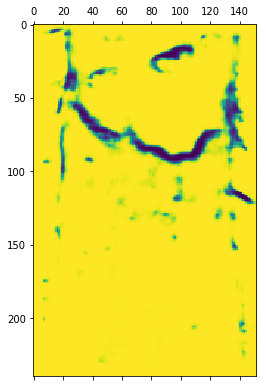

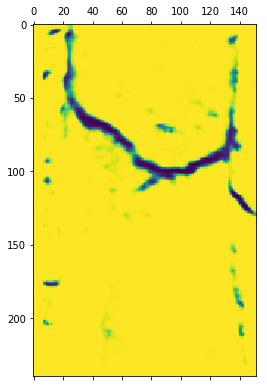

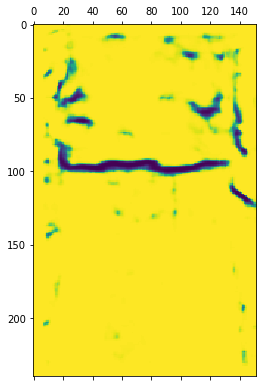

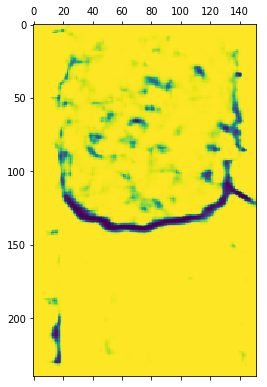

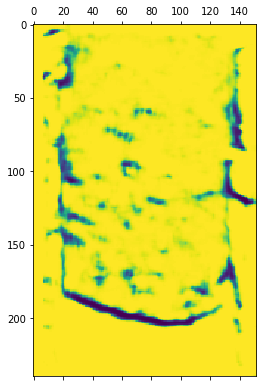

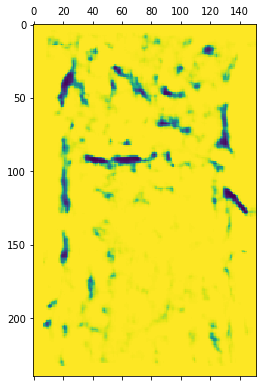

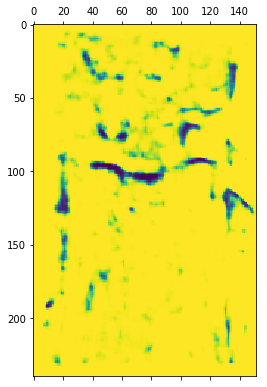

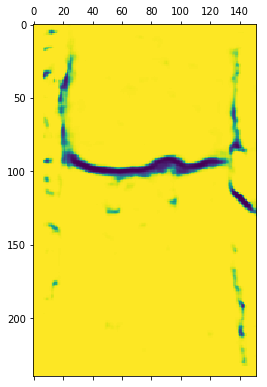

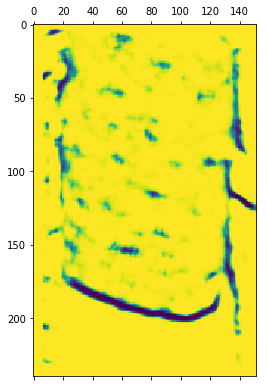

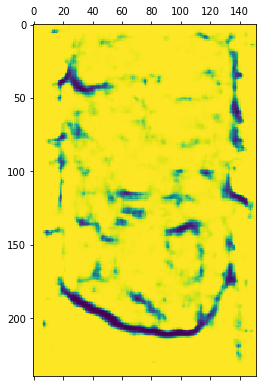

In [49]:
#Check the prediction results 
for i in range(len(out_imgs)):
    img_final = out_imgs[i][:data_test['orig_shape'][0],:data_test['orig_shape'][1]]
    print(img_final.shape)
    matshow(img_final[:,:,0])
    

In [30]:
#Save the prediction results 
out_subdir = {}
out_subdir['prediction_raw'] = os.path.join(tst_dir,'labels_predict_raw', 'model') #change according to which model you're using
if (not os.path.isdir(out_subdir['prediction_raw'])):
    os.mkdir(out_subdir['prediction_raw'])
    
for i in range(len(out_imgs)):
    img_final = out_imgs[i][:data_test['orig_shape'][0],:data_test['orig_shape'][1]]
     #-- convert to image
    im = image.array_to_img(img_final)
    out_name = '%s.png'%((data_test['tst_names'][i].replace('_Subset','')))
    print(os.path.join(tst_dir,out_subdir['prediction_raw'],out_name)) 
    im.save(os.path.join(tst_dir,out_subdir['prediction_raw'],out_name))
   

/home/lorien/KTH/AG_projet/test/labels_predict_raw/model6/LT05_L1TP_233013_19890629_20170202_01_T1_B2.png.png
/home/lorien/KTH/AG_projet/test/labels_predict_raw/model6/LT05_L1TP_231014_19850908_20170218_01_T1_B2.png.png
/home/lorien/KTH/AG_projet/test/labels_predict_raw/model6/LE07_L1TP_233013_20000721_20170210_01_T1_B8.png.png
/home/lorien/KTH/AG_projet/test/labels_predict_raw/model6/LE07_L1TP_233013_20020625_20170129_01_T2_B8.png.png
/home/lorien/KTH/AG_projet/test/labels_predict_raw/model6/LC08_L1TP_233013_20160725_20170322_01_T1_B8.png.png
/home/lorien/KTH/AG_projet/test/labels_predict_raw/model6/LE07_L1GT_233013_20010318_20170206_01_T2_B8.png.png
/home/lorien/KTH/AG_projet/test/labels_predict_raw/model6/LE07_L1TP_233013_20000331_20170212_01_T2_B8.png.png
/home/lorien/KTH/AG_projet/test/labels_predict_raw/model6/LT05_L1TP_233013_19940830_20170113_01_T2_B2.png.png
/home/lorien/KTH/AG_projet/test/labels_predict_raw/model6/LC08_L1TP_233013_20140821_20170420_01_T1_B8.png.png
/home/lori

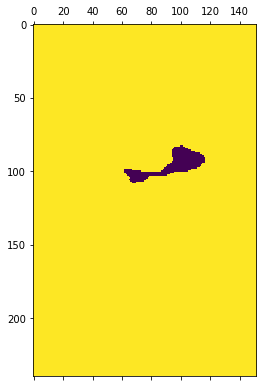

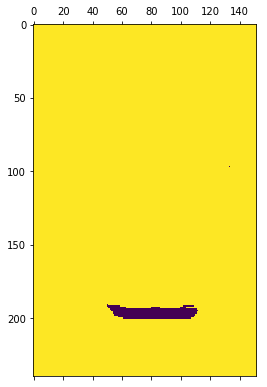

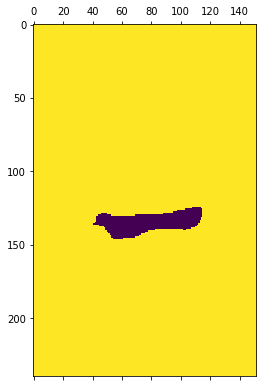

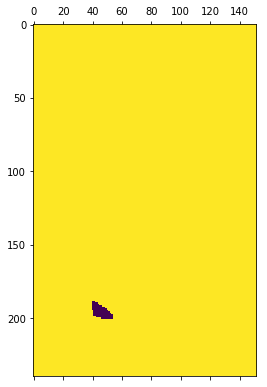

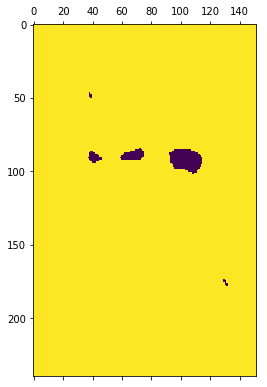

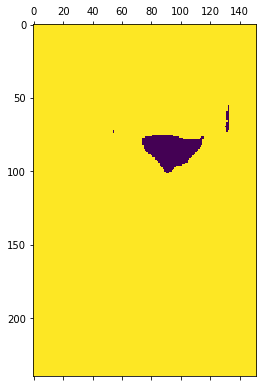

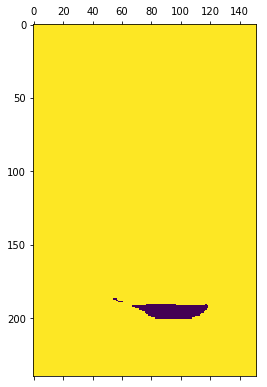

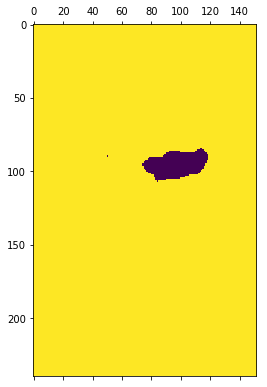

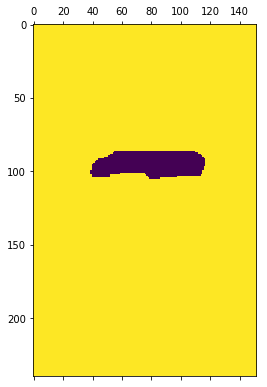

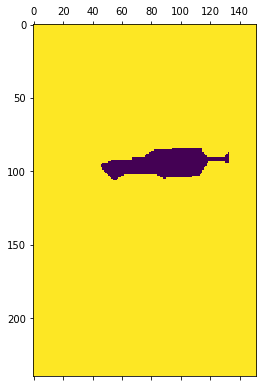

In [47]:
# Post processing (can be turned to a function and the data can be stored as previously done for an easier use)
import glob 
import cv2
import numpy as np 
import os
from PIL import Image, ImageOps
from skimage.morphology import square


indir = "/home/lorien/KTH/AG_projet/test/labels_predict_raw/model"
#change according to the model used
tst_list = glob.glob(os.path.join(indir,'*.png'))
tst_files = os.listdir(indir)

n_test = len(tst_files)
for f in range(n_test):
    front_temp = ImageOps.autocontrast(Image.open(os.path.join(indir,tst_files[f])))
    #keep the original
    fr = np.array(front_temp)
    #matshow(fr)
    th, threshed1 = cv2.threshold(fr,30,255,cv2.THRESH_BINARY)
    #matshow(threshed1)
    morph = cv2.dilate(threshed1, np.ones((1,10)), iterations = 1)
    matshow(morph)
    #imsave(os.path.join(tst_dir,'test_fin',f), morph)

In [ ]:
#Check result when applying a sobel filter: can also be turned to a function and
#results can be saved for easier use 

from skimage.filters import sobel
from scipy import ndimage

threshold = 0.6
out_subdir = 'output_sobel'    
indir = "/home/lorien/KTH/AG_projet/test/test_images_preprocessed"
tst_list = glob.glob(os.path.join(indir,'*.png'))
tst_files = os.listdir(indir)

for i in range(len(tst_files)):
    #-- using scikit image sobel filter
    front_temp = Image.open(os.path.join(indir,tst_files[i]))
    front = sobel(np.array(front_temp)/255.)
    #matshow(front)
    #-- invert image colors
    front = 1 - front
    #matshow(front)
    if threshold != 0:
        #-- set threshold
        ind = np.where(front >= threshold)
        front[ind] = 1.
        matshow(front)